In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [3]:
import pandas as pd

In [4]:
import quandl
# set api key
quandl.ApiConfig.api_key = "sY8rR9LTz4kT5z2cs94v"

In [5]:
index = quandl.get('BSE/SENSEX',start_date = '2010-04-01')

In [6]:
index.head()

,Open,High,Low,Close
Date,,,,
2010-04-01,17555.04,17706.56,17555.04,17692.62
2010-04-05,17693.66,17948.54,17693.66,17935.68
2010-04-06,17940.32,17991.41,17898.00,17941.37
2010-04-07,17915.60,18047.86,17878.31,17970.02
2010-04-08,17950.56,17960.91,17679.34,17714.40


In [7]:
tcs = quandl.get('NSE/TCS',start_date='2010-04-01')

In [8]:
tcs.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-04-01,786.35,809.8,782.10,808.0,807.80,2890716.0,23087.28
2010-04-05,817.00,817.0,799.25,803.0,803.35,1500918.0,12069.64
2010-04-06,808.90,808.9,792.15,796.0,796.05,1851183.0,14776.78
2010-04-07,790.00,809.0,781.15,798.2,798.05,1512279.0,11983.17
2010-04-08,796.00,807.5,790.00,795.1,799.45,2247219.0,18033.53


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

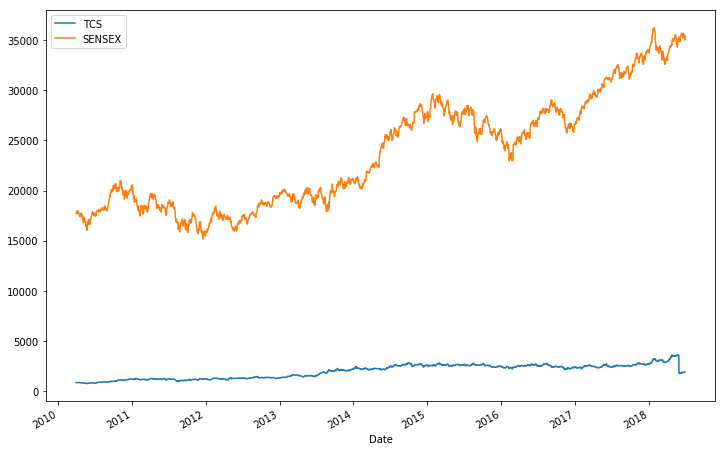

In [10]:
tcs['Close'].plot(label='TCS',figsize=(12,8))
index['Close'].plot(label='SENSEX')
plt.legend()

In [11]:
tcs['Cumulative'] = tcs['Close']/tcs['Close'].iloc[0]
index['Cumulative'] = index['Close']/index['Close'].iloc[0]

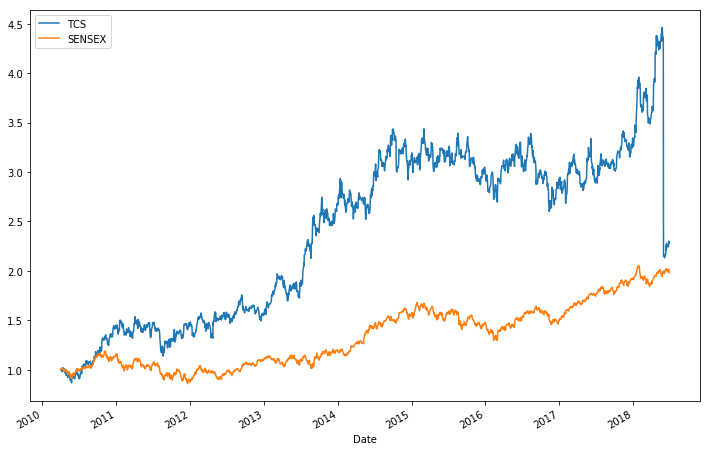

In [12]:
tcs['Cumulative'].plot(label='TCS',figsize=(12,8))
index['Cumulative'].plot(label='SENSEX')
plt.legend()

In [13]:
tcs['DAily return'] = tcs['Close'].pct_change(1)
index['Daily return'] = index['Close'].pct_change(1)

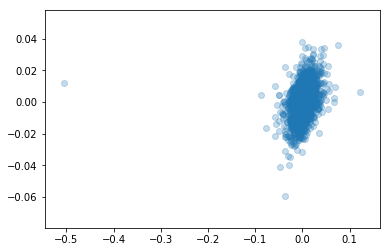

In [14]:
plt.scatter(tcs['DAily return'],index['Daily return'],alpha=0.25)

In [15]:
beta,alpha,r_value,p_value,std_err = stats.linregress(tcs['DAily return'].iloc[1:],index['Daily return'].iloc[1:])

In [16]:
beta

0.16590518981367638

In [17]:
alpha

0.00028171077290674437

In [18]:
r_value

0.33218349038049166

# CAPM using Statsmodels

We did not factor in Covariance before, which is very important and fundamental to the concept of investing. Here we try to see if that makes a difference.

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
plt.style.use('ggplot')

In [42]:
#We get the market OHLC for the last 10 years here
start = pd.to_datetime('2008-04-01')
end = pd.to_datetime('2018-06-30')
sensex = web.DataReader('BSE/SENSEX','quandl',start=start,end=end,access_key="sY8rR9LTz4kT5z2cs94v")

In [45]:
sensex = sensex.sort_index()
#sensex

In [50]:
sensex.tail()

,Open,High,Low,Close
Date,,,,
2018-06-25,35783.75,35806.97,35430.11,35470.35
2018-06-26,35355.72,35616.64,35338.09,35490.04
2018-06-27,35543.89,35618.85,35154.21,35217.11
2018-06-28,35207.19,35282.40,34937.15,35037.64
2018-06-29,35128.16,35459.05,35099.65,35423.48


In [48]:
itc = web.DataReader('ITC.IN','quandl',start=start,end=end)

In [49]:
itc = itc.sort_index()
itc.tail()

,Open,High,Low,Last,Close,TotalTradeQuantity,TurnoverLacs
Date,,,,,,,
2018-06-25,265.15,265.40,259.75,262.7,262.60,13617718.0,35672.88
2018-06-26,262.45,266.15,262.15,264.0,264.80,10087090.0,26737.02
2018-06-27,264.90,265.00,261.50,263.0,262.75,10036967.0,26342.35
2018-06-28,262.00,264.00,259.00,260.0,260.50,14637010.0,38316.90
2018-06-29,261.80,267.55,260.30,265.0,266.20,10907020.0,28867.46


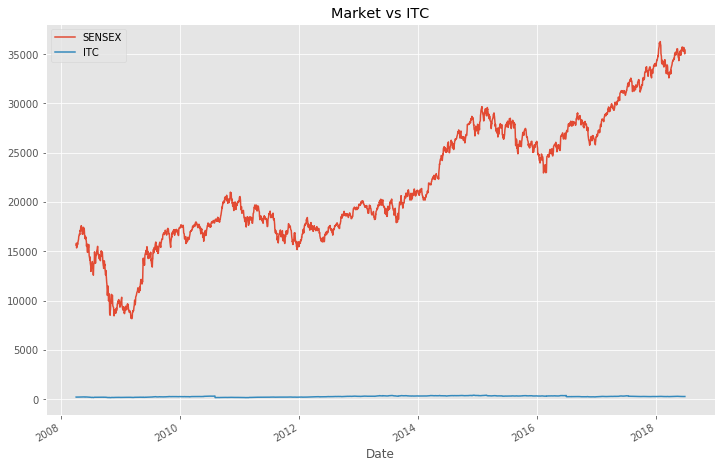

In [51]:
sensex['Close'].plot(figsize=(12,8),title='Market vs ITC',label='SENSEX')
itc['Close'].plot(label='ITC')
plt.legend()

In [52]:
sensex['Cumulative Returns'] = sensex['Close']/sensex['Close'].iloc[0]
itc['Cumulative Returns'] = itc['Close']/itc['Close'].iloc[0]

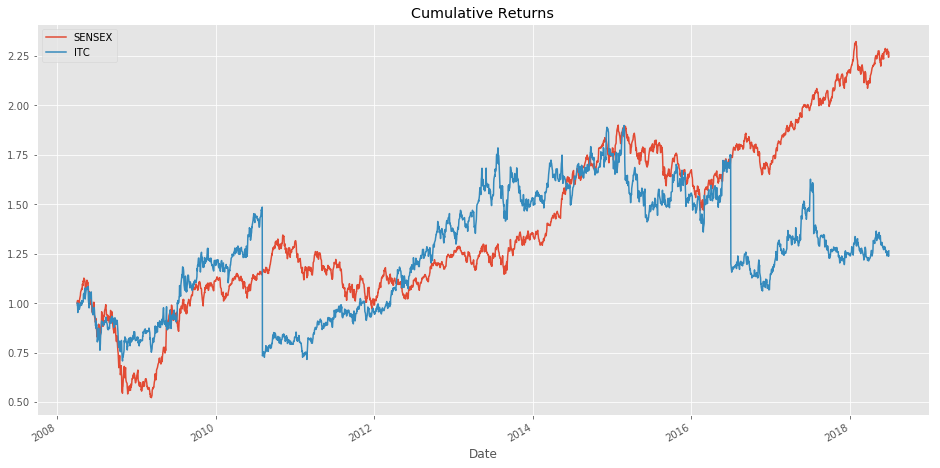

In [55]:
sensex['Cumulative Returns'].plot(figsize=(16,8),title='Cumulative Returns',label='SENSEX')
itc['Cumulative Returns'].plot(label='ITC')
plt.legend()

In [56]:
#Calculating daily returns
sensex['Daily Returns'] = sensex['Close'].pct_change(1)
itc['Daily Returns'] = itc['Close'].pct_change(1)

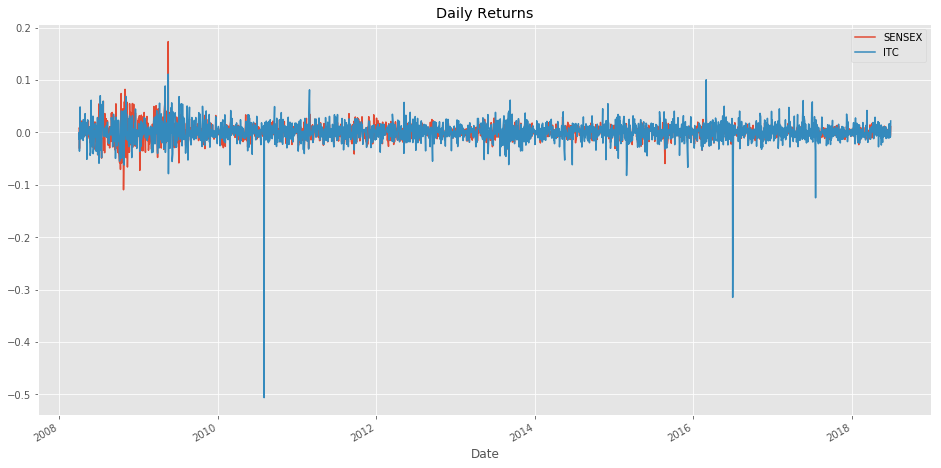

In [57]:
sensex['Daily Returns'].plot(figsize=(16,8),title='Daily Returns',label='SENSEX')
itc['Daily Returns'].plot(label='ITC')
plt.legend()

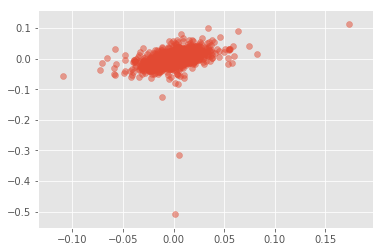

In [64]:
#Scatter plot
plt.scatter(sensex['Daily Returns'],itc['Daily Returns'],alpha=0.5)

In [65]:
#CAPM
Y = itc['Daily Returns'].iloc[1:]
X = sensex['Daily Returns'].iloc[1:]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [66]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Daily Returns   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     519.9
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          7.87e-105
Time:                        18:10:19   Log-Likelihood:                 6481.1
No. Observations:                2537   AIC:                        -1.296e+04
Df Residuals:                    2535   BIC:                        -1.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.945e-05      0.000      0.213      0.832      -0.001       0.001
Daily Returns     0.6254      0.027     22.801      0.000       0.572       0.679
==============================================================================
Omnibus:                     4049.682   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6201119.115
Skew:                          -9.705   Prob(JB):                         0.00
Kurtosis:                     244.425   Cond. No.                         73.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#Plotting the best fit line
results.params

const            0.000079
Daily Returns    0.625384
dtype: float64

In [70]:
covariance = itc['Daily Returns'].cov(sensex['Daily Returns'])
covariance

0.00011602520035506192

In [75]:
itc_predicted = results.predict()
itc_predicted

array([ 0.00503318,  0.00334129, -0.019253  , ..., -0.00472996,
       -0.00310758,  0.00696628])

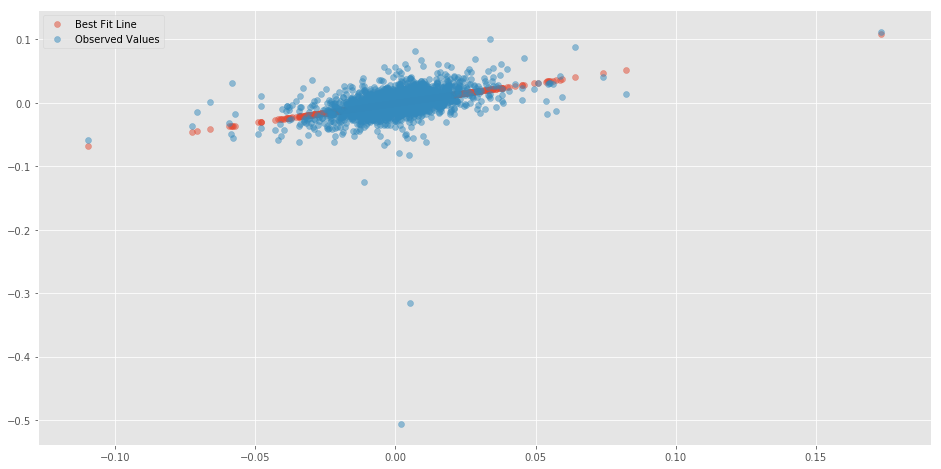

In [78]:
plt.rcParams['figure.figsize'] = (16,8)
plt.scatter(sensex['Daily Returns'].iloc[1:],itc_predicted,alpha=0.5,label='Best Fit Line')
plt.scatter(sensex['Daily Returns'].iloc[1:],itc['Daily Returns'].iloc[1:],alpha=0.5,label='Observed Values')
plt.legend()